In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import lazypredict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
dataset= pd.read_csv('/content/framingham.csv')

In [ ]:
dataset.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
dataset.shape

(4240, 16)

In [ ]:
dataset.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.isna().sum()

645

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

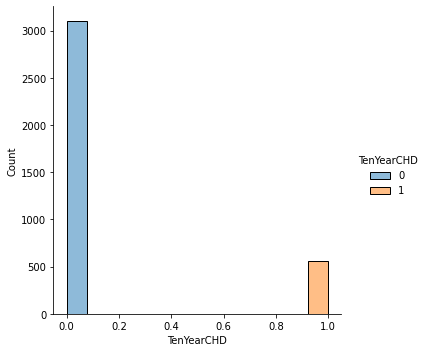

In [ ]:
sn.displot(dataset, x="TenYearCHD", hue='TenYearCHD')

In [ ]:
noo_stroke = dataset.loc[dataset['TenYearCHD'] == 0].sample(n = 557)
stroke = dataset.loc[dataset['TenYearCHD'] == 1]
frames = [stroke,noo_stroke]
new_data = pd.concat(frames)

In [ ]:
new_data.shape

(1096, 12)

In [ ]:
new_data['TenYearCHD'].value_counts()

1    557
0    557
Name: TenYearCHD, dtype: int64

In [ ]:
new_data=new_data.sample(n = 1114)

In [ ]:
new_data[0:8]

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1796,0,59,1.0,0,0.0,0.0,0,1,0,240.0,155.5,100.5,33.54,72.0,116.0,1
2927,1,48,2.0,1,20.0,0.0,0,1,0,230.0,140.5,89.0,23.34,66.0,80.0,1
1371,0,55,2.0,0,0.0,0.0,0,1,0,340.0,140.0,83.0,26.18,75.0,83.0,0
2324,1,43,1.0,1,15.0,0.0,0,0,0,249.0,145.0,85.0,28.77,75.0,100.0,0
2058,1,60,2.0,1,20.0,0.0,0,0,0,305.0,112.5,75.0,22.70,75.0,98.0,1
3074,0,63,2.0,0,0.0,0.0,0,1,0,184.0,196.0,101.0,28.27,86.0,82.0,1
82,0,53,2.0,0,0.0,0.0,0,0,0,210.0,138.0,86.5,22.49,88.0,87.0,0
3880,1,41,2.0,0,0.0,0.0,0,0,0,246.0,111.5,67.0,18.76,65.0,60.0,0


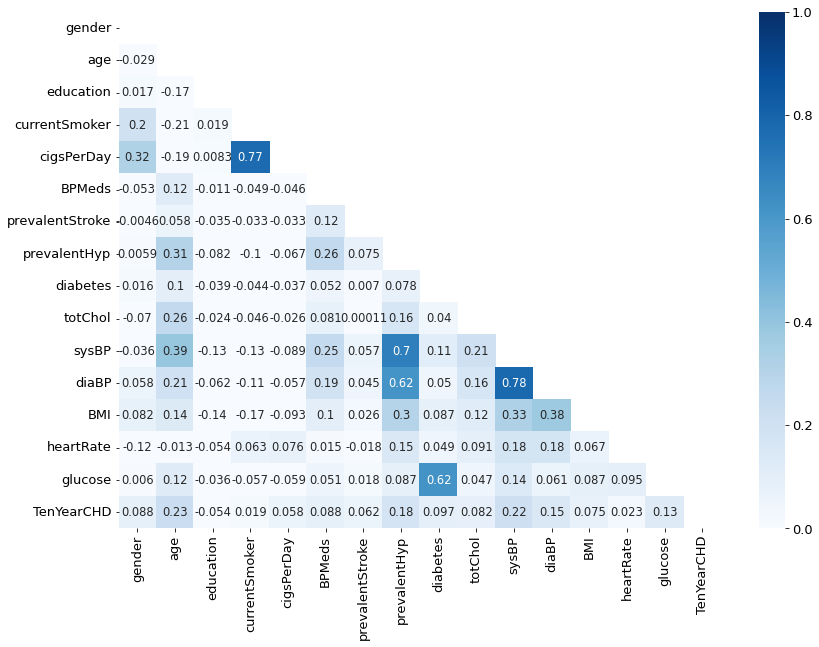

In [ ]:
plt.rc('xtick', labelsize=13)   # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  # fontsize of the tick labels
plt.figure(figsize=(13.5, 9.5))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sn.heatmap(dataset.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Blues', annot_kws={"size": 11.5})

In [ ]:
predictors= new_data.iloc[:, 1:15]
labels= new_data.iloc[:,-1]
x_train, x_test, y_train, y_test= train_test_split(predictors, labels, test_size=0.2)

In [ ]:
data= new_data[['age', 'prevalentHyp', 'sysBP' ,	'diaBP', 'glucose', 'TenYearCHD']]
predictors1= data.iloc[:, 0:5]
labels1= data.iloc[:,-1]
x_trainn, x_testt, y_trainn, y_testt= train_test_split(predictors1, labels1, test_size=0.2)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(x_train, y_train)

In [ ]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(np.round(fit.scores_))
features = fit.transform(x_train)
# summarize selected features
print(features[0:5,:])

[78.  3.  1.  6.  8.  0. 35. 12. 10. 50. 26. 11.  1. 14.]
[[ 60.    0.  155.   90. ]
 [ 56.    1.  150.5  94. ]
 [ 43.    0.  131.   87. ]
 [ 40.    1.  142.5  95. ]
 [ 52.    0.  131.   74. ]]


<BarContainer object of 14 artists>

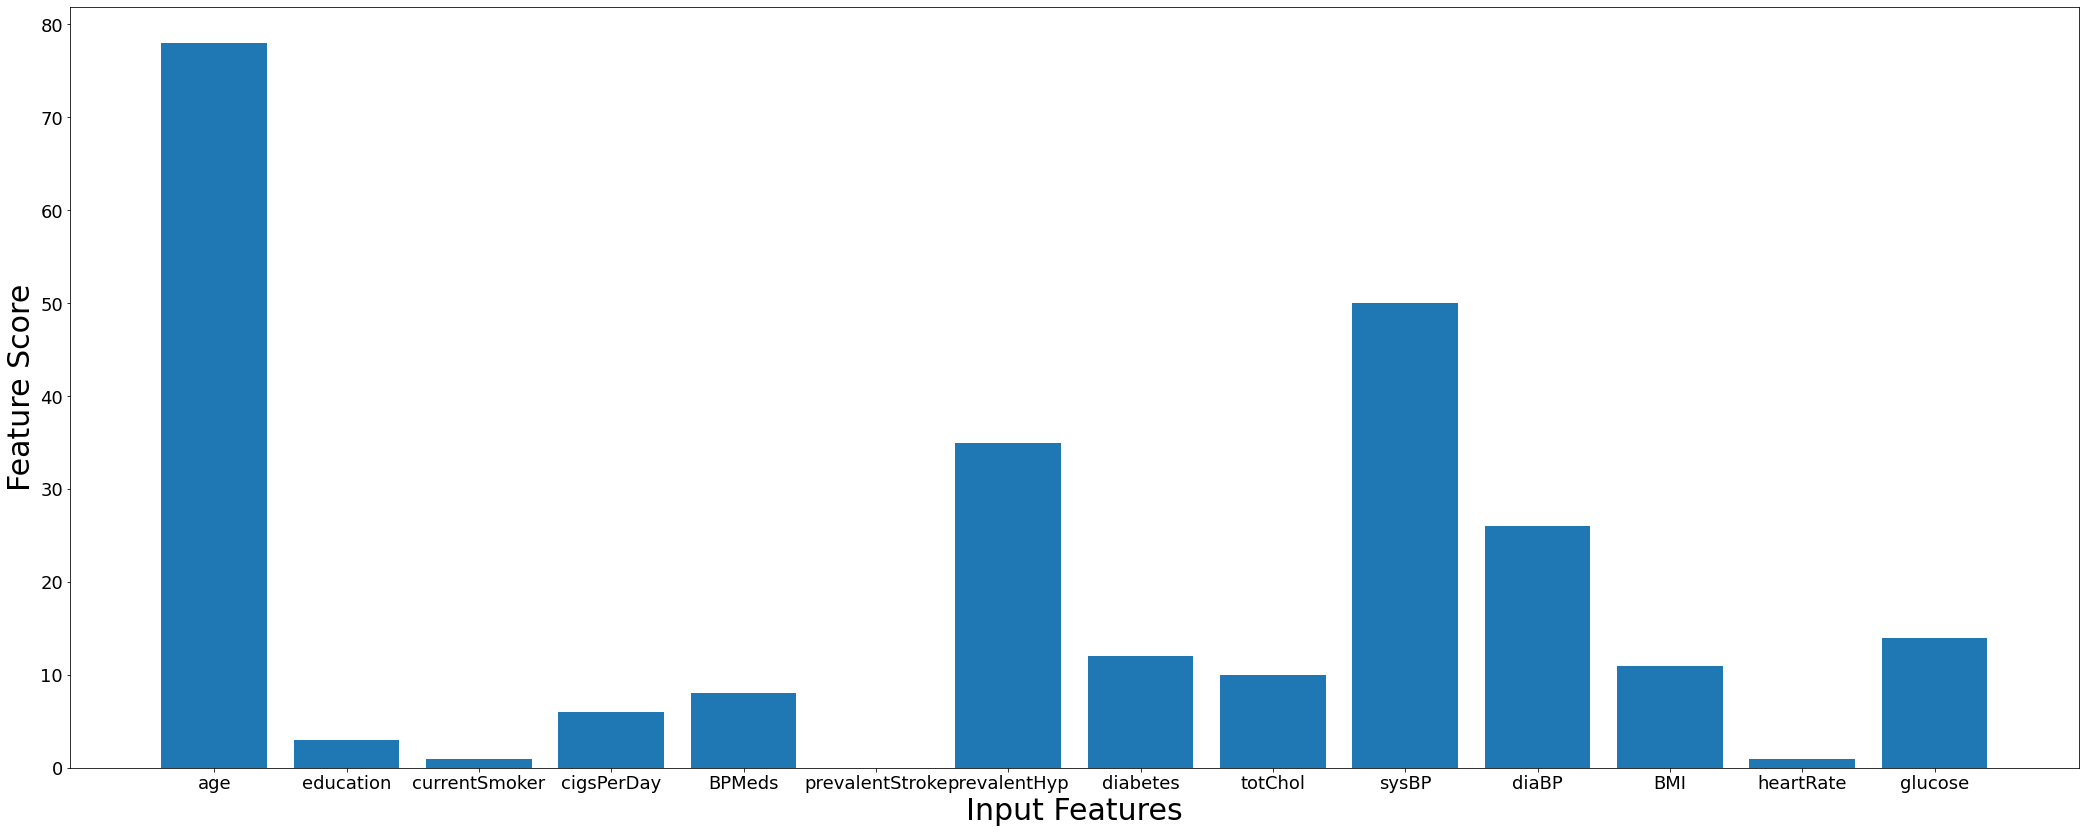

In [ ]:
from matplotlib import rcParams
data=[78,  3,  1,  6,  8,  0, 35, 12, 10, 50, 26, 11,  1, 14]
labelsize=18
rcParams['xtick.labelsize']= labelsize
rcParams['ytick.labelsize']= labelsize
plt.figure(figsize =(36, 14))
labels = ['age',	'education',	'currentSmoker',	'cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']
#labels = X.columns
plt.xlabel('Input Features', fontsize=30)
plt.ylabel('Feature Score', fontsize=30)
plt.bar(labels, data)

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 14.51it/s]


In [ ]:
models # Results using all the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.65,0.65,0.65,0.65,0.08
LinearDiscriminantAnalysis,0.62,0.62,0.62,0.62,0.03
RidgeClassifierCV,0.62,0.62,0.62,0.62,0.03
RidgeClassifier,0.62,0.62,0.62,0.62,0.02
KNeighborsClassifier,0.62,0.62,0.62,0.62,0.03
NearestCentroid,0.62,0.62,0.62,0.62,0.03
LinearSVC,0.61,0.62,0.62,0.61,0.13
CalibratedClassifierCV,0.61,0.62,0.62,0.61,0.24
LogisticRegression,0.61,0.62,0.62,0.61,0.02


In [ ]:
models # Results using selected features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.73,0.73,0.73,0.73,0.09
LogisticRegression,0.72,0.72,0.72,0.72,0.03
LinearSVC,0.71,0.71,0.71,0.71,0.14
CalibratedClassifierCV,0.71,0.71,0.71,0.71,0.24
RidgeClassifierCV,0.71,0.71,0.71,0.71,0.03
RidgeClassifier,0.71,0.71,0.71,0.71,0.02
LinearDiscriminantAnalysis,0.71,0.71,0.71,0.71,0.02
KNeighborsClassifier,0.70,0.70,0.70,0.70,0.03
AdaBoostClassifier,0.70,0.69,0.69,0.70,0.14
